# Nuages de mots : analyse de la pertinence des clusters


## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pirar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux de la décennie de 1890-1899

In [3]:
# Choisir une année
DECADE = 1890

In [5]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(DECADE) in f]
len(txts)

100

In [6]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [7]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [8]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"Commencera demain lundi le 6 janvier Notre vente n’ù, lieu qu'une fois'par'ail, n 9 driétr de commun ètïï§ : ] être confondüè avec ùucune autre mise en vente. 1 Ce n’est pas une vente de soldes ou de "

In [10]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{DECADE}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [11]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{DECADE}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"Commencera demain lundi le 6 janvier Notre vente n’ù, lieu qu'une fois'par'ail, n 9 driétr de commun ètïï§ : ] être confondüè avec ùucune autre mise en vente. 1 Ce n’est pas une vente de soldes ou de marchandises déclassées,. priais bien une tiqüidaUqm ' Irûle de tous nos articles. ' ; iPendant la durée de la vente -toutes nos marchandnëê/sUm aucune* exception : SOfEMîmJi' VELOURS, LAINAGES, DRAPEWm, TISSUS POUR R ALS' ET SOIRÉES, ROBES ET-' MANTEAUX, FOURRURES, JUPES DRAPÉES-, PEIGNOIRS-, MORES"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [12]:
def clean_text(DECADE, folder=None):
    if folder is None:
        input_path = f"{DECADE}.txt"
        output_path = f"{DECADE}_clean.txt"
    else:
        input_path = f"{folder}/{DECADE}.txt"
        output_path = f"{folder}/{DECADE}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [13]:
clean_text(DECADE, folder=temp_path)

'Output has been written in ../data/tmp/1890_clean.txt!'

In [14]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{DECADE}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'COMMENCERA DEMAIN LUNDI JANVIER VENTE LIEU FOIS AIL DRIÉTR COMMUN ÈTÏÏ CONFONDÜÈ ÙUCUNE MISE VENTE VENTE SOLDES MARCHANDISES DÉCLASSÉES PRIAIS TIQÜIDAUQM IRÛLE ARTICLES IPENDANT DURÉE VENTE MARCHANDNËÊ SUM AUCUNE EXCEPTION SOFEMÎMJI VELOURS LAINAGES DRAPEWM TISSUS ALS SOIRÉES ROBES MANTEAUX FOURRURES JUPES DRAPÉES PEIGNOIRS MORES INTÉRIEUR CHALES CORSETS JUPONS DESSOUS SORTIES MALETDE THÉÂTRE VENDU PRIX INVENTAIRE DÉS DIFFÉRENCES PRIÂT GRANDES PVIX RÉELS PRIX INVÉNTAITE TROUVE SNR CHAQUE PIÈCE M'

## Nuage de mots

### Afficher les termes les plus fréquents


In [15]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 3335), ('MAISON', 1054), ('LOUER', 950), ('ANS', 902), ('BRUXELLES', 893), ('PLACE', 848), ('DEMANDE', 642), ('FILLE', 634), ('PRIX', 602), ('DÉS', 601)]


### Créer, stocker et afficher le nuage de mots

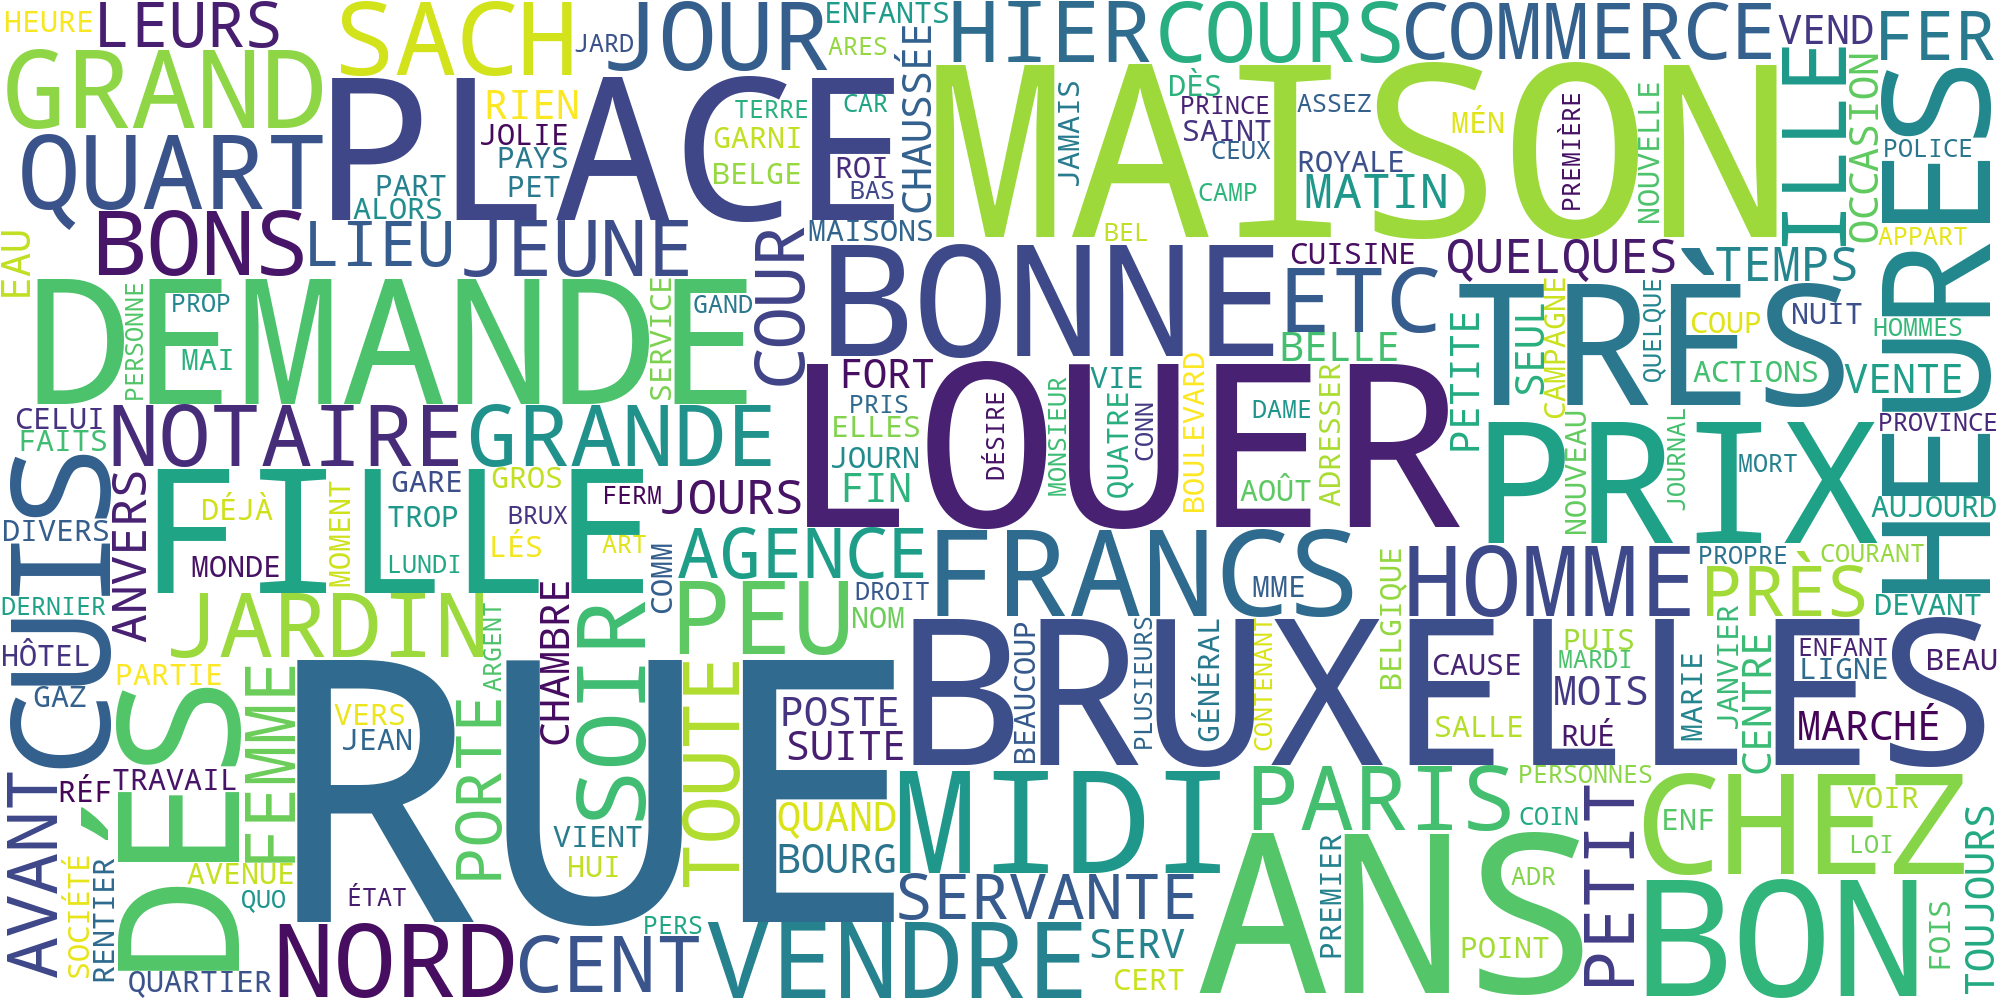

In [17]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{DECADE}.png"))
Image(filename=os.path.join(temp_path, f"{DECADE}.png"))